In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Hides warning

In [2]:
# import dataset
df = pd.read_csv('Train_data.csv')
df.head() # See the first 5 rows of the dataset

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# dis
df.shape

(54808, 14)

In [4]:
# Check the datatypes of the columns
df.describe

<bound method NDFrame.describe of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_training

In [5]:
# Check for missing values
df.isnull().sum() # No missing values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum() # No duplicates

0

In [7]:
# Check for outliers
df.describe() # No outliers

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
# Check for skewness
df.skew() # skewness

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

In [9]:
# find the rows where 'previous_year_rating' is missing and 'length_of_service' is = 1
df.loc[(df['previous_year_rating'].isnull()) & (df['length_of_service'] == 1)]


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


we observe that last years rating is missing for the new employees THEY COULD NOT HAVE BEEN RATED therefore we shall asume a mean rating for them since it is their 1st year


In [10]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mean()) # Replace missing values with the mean of the column

In [11]:
# Check for missing values
df.isnull().sum() # No missing values

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
# dropping the rows with missing values
df = df.dropna()

In [13]:
# employee id adds no value to the analysis
# dropping the employee id column
df = df.drop('employee_id', axis=1) # axis = 1 means column
df.head() # See the first 5 rows of the dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


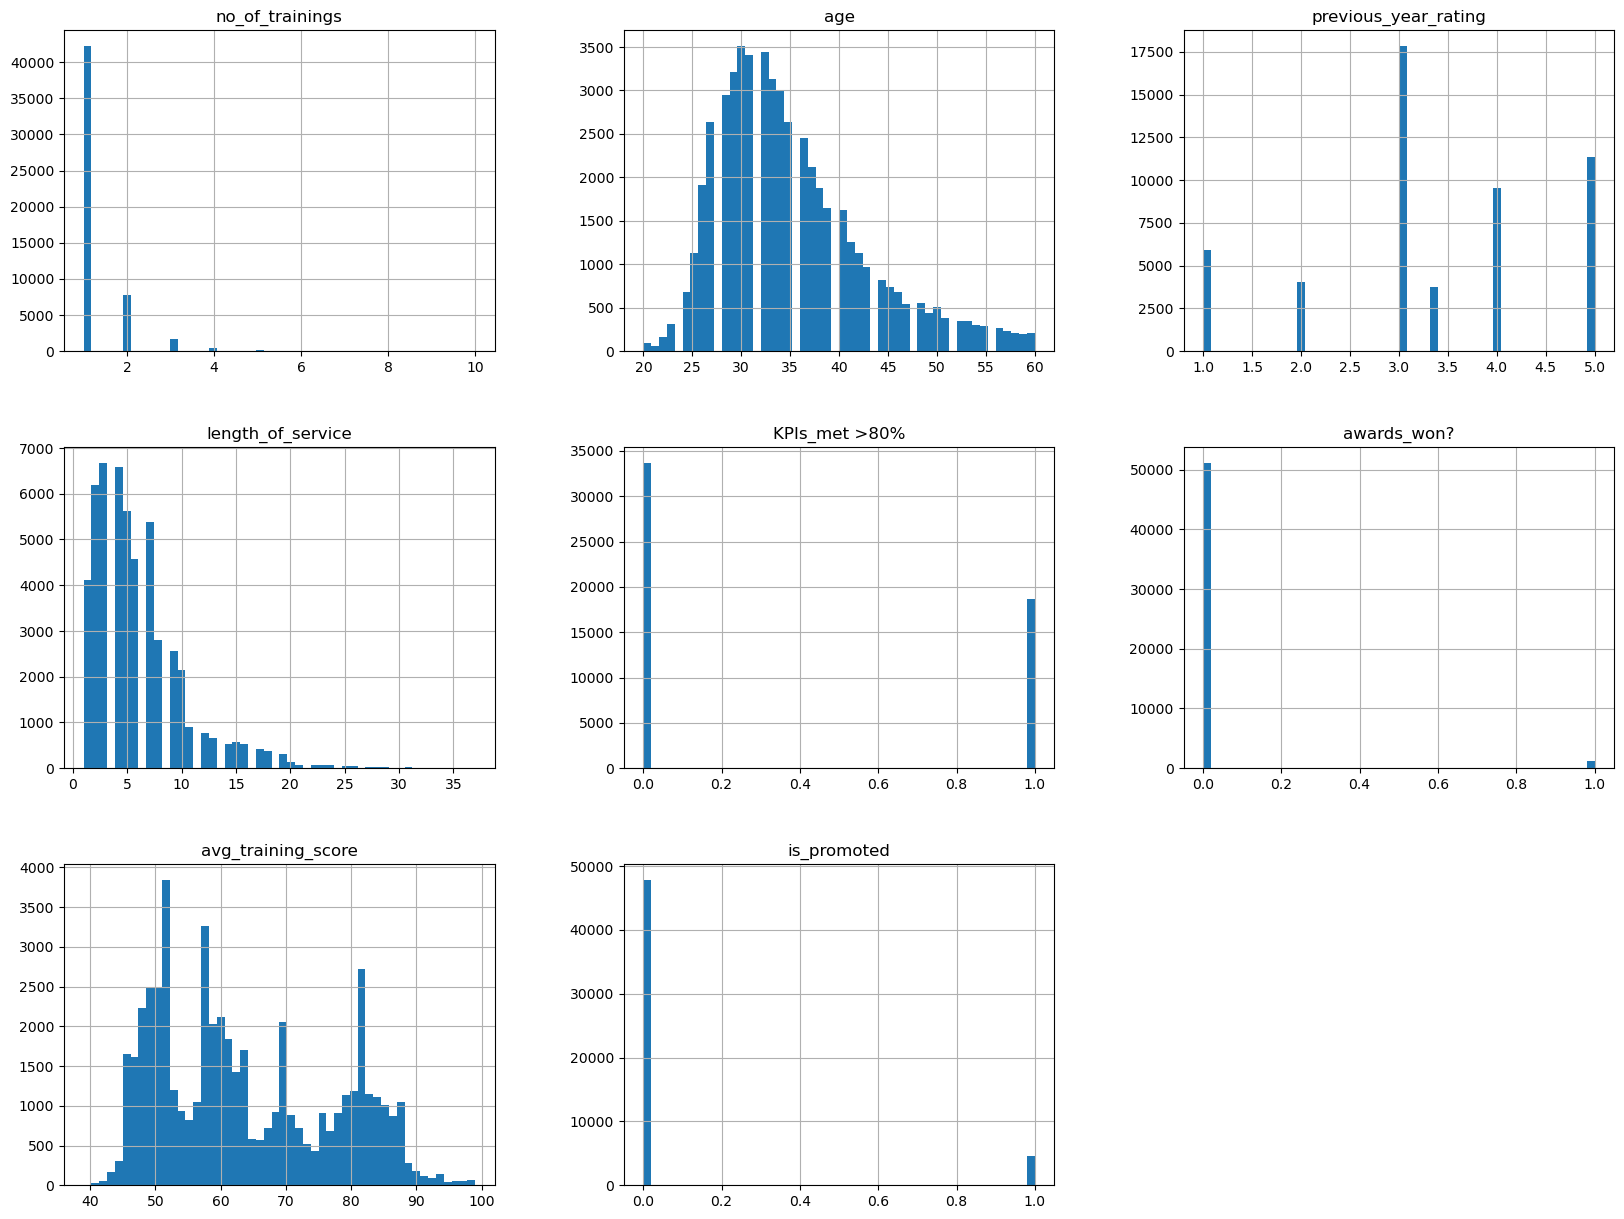

<Figure size 640x480 with 0 Axes>

In [14]:
# creating visuaalization of the data
df.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('attribute_histogram_plots') # save as png

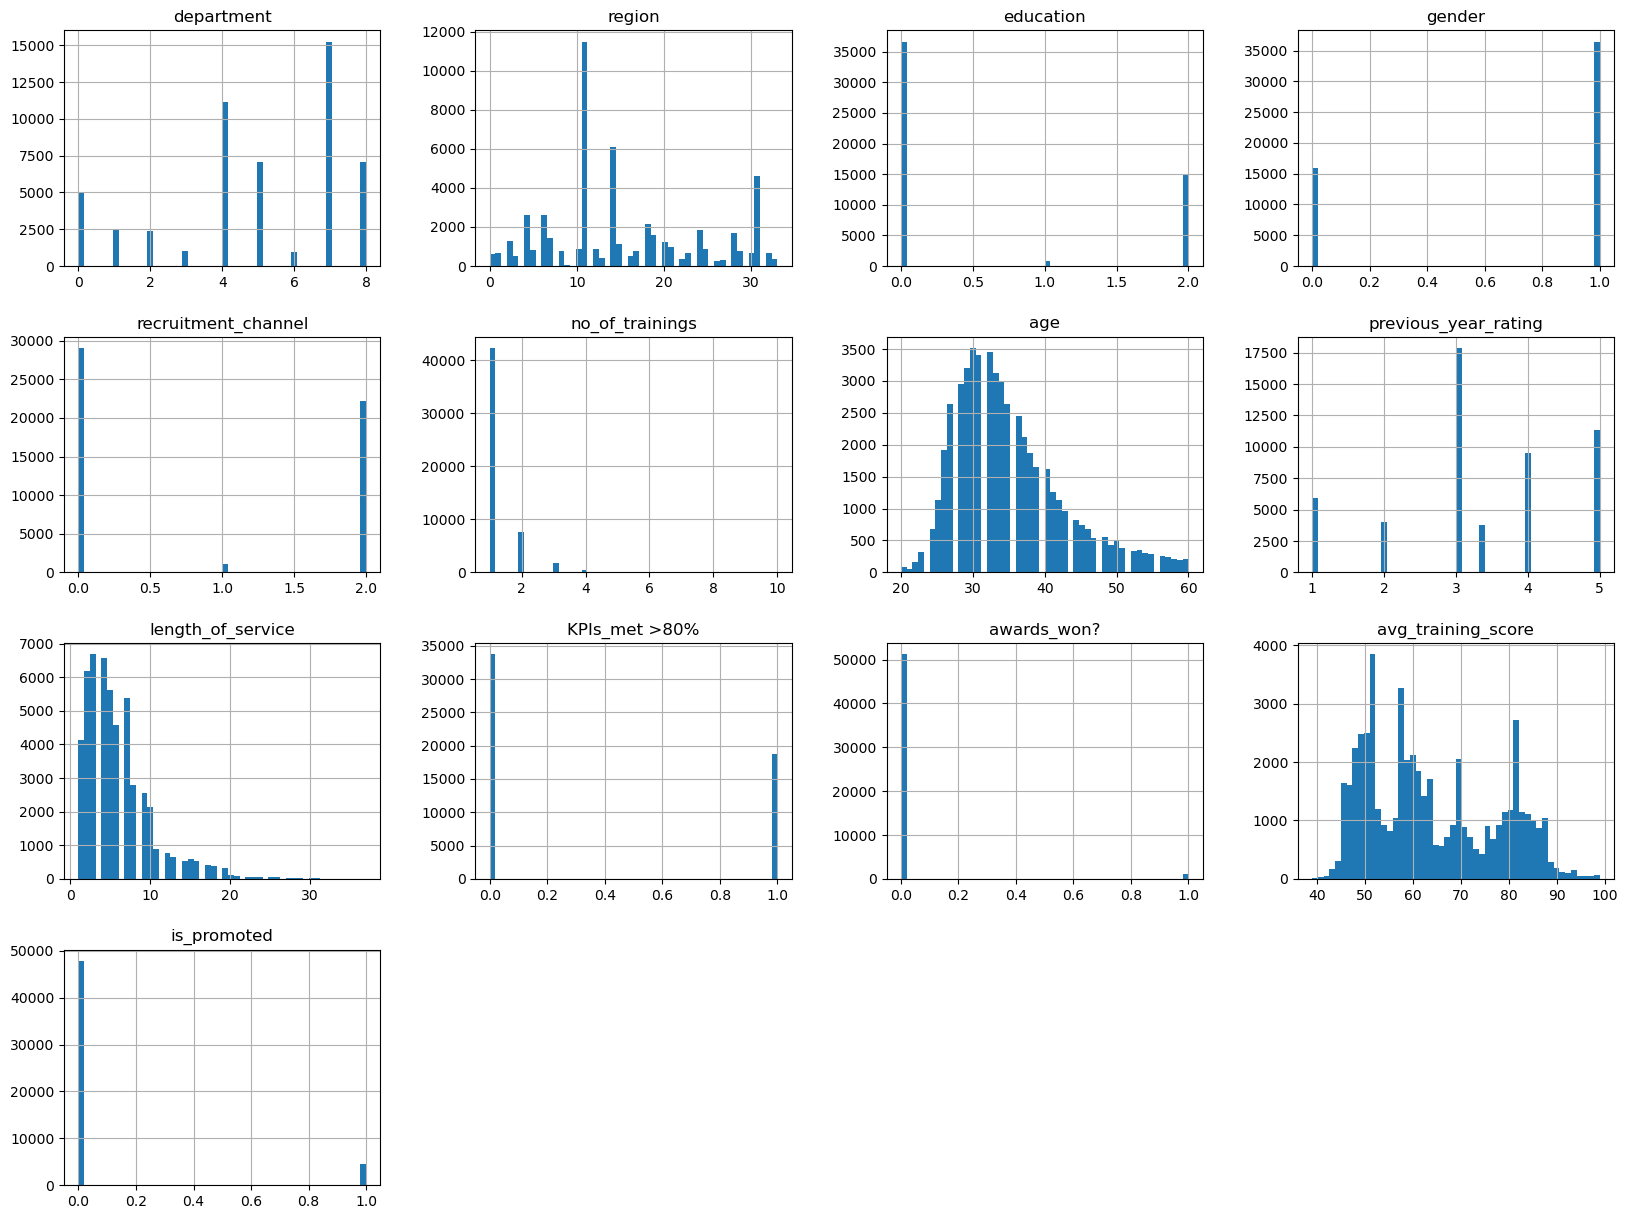

<Figure size 640x480 with 0 Axes>

In [32]:
# creating visuaalization of the data
df.hist(bins=50, figsize=(20,15))
plt.show()
plt.savefig('attribute_histogram_plots') # save as png

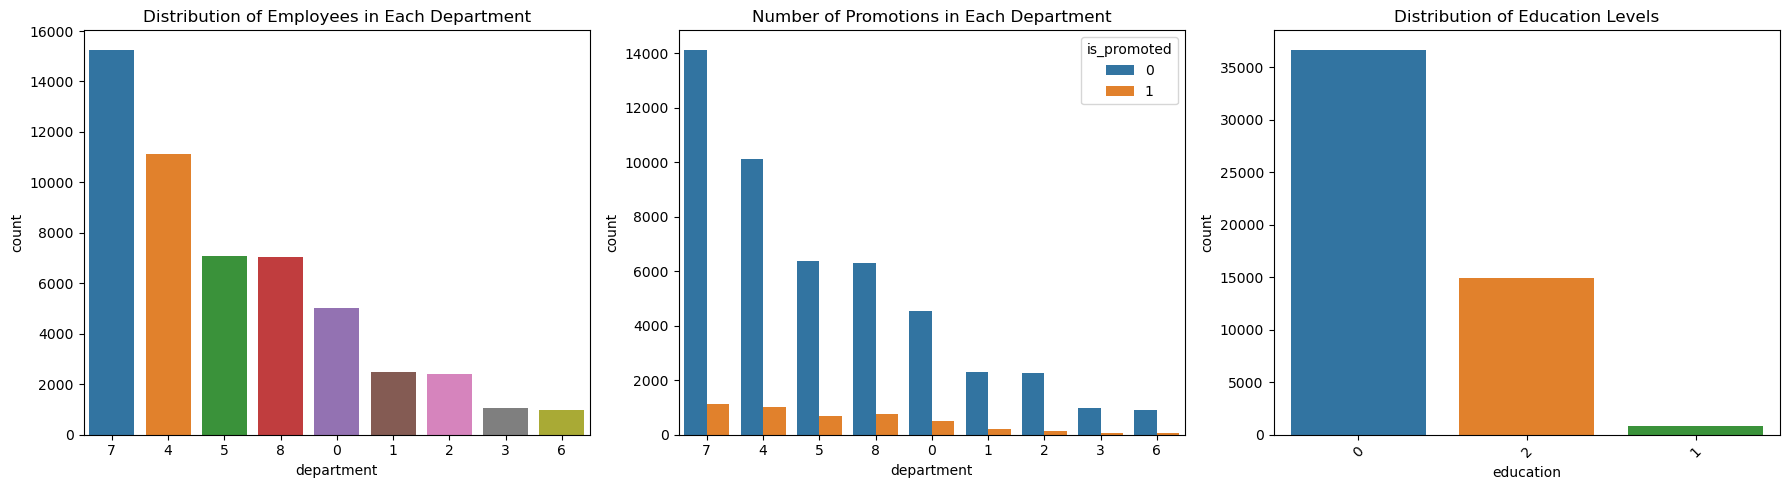

In [33]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for visualizations
plt.figure(figsize=(18, 5))

# Plot 1: Distribution of employees in each department
plt.subplot(131)
sns.countplot(x='department', data=df, order=df['department'].value_counts().index)
plt.title('Distribution of Employees in Each Department')

# Plot 2: Number of promotions (is_promoted) for each department
plt.subplot(132)
sns.countplot(x='department', data=df, hue='is_promoted', order=df['department'].value_counts().index)
plt.title('Number of Promotions in Each Department')

# Plot 3: Distribution of education levels
plt.subplot(133)
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


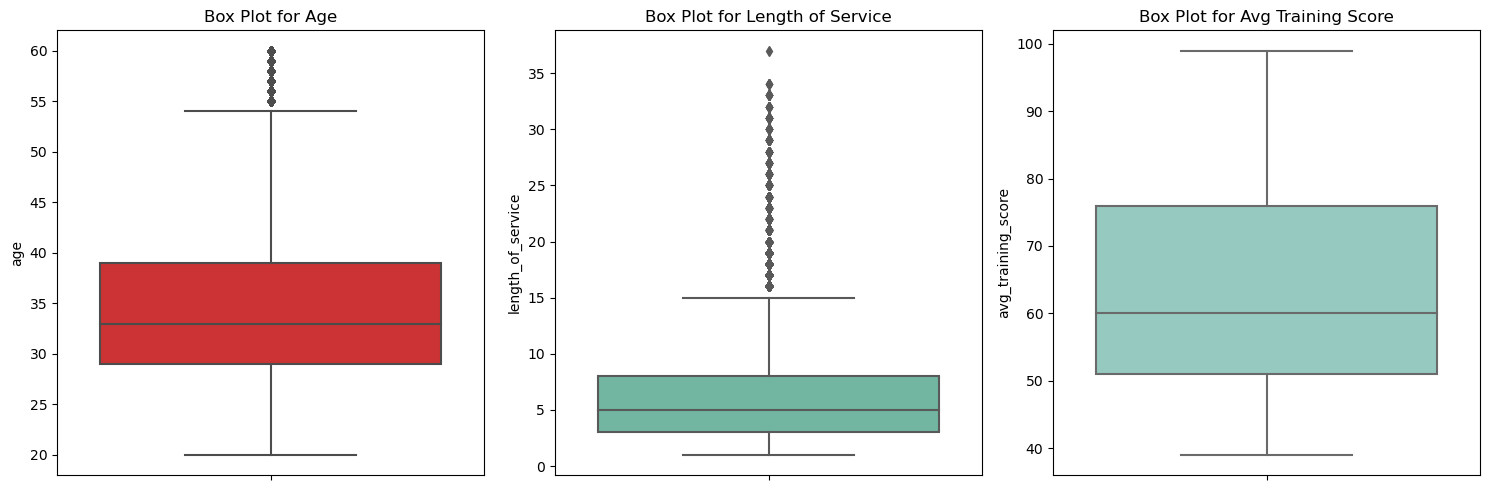

In [34]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Box plot for 'age'
plt.subplot(131)
sns.boxplot(y='age', data=df, palette='Set1')
plt.title('Box Plot for Age')

# Plot 2: Box plot for 'length_of_service'
plt.subplot(132)
sns.boxplot(y='length_of_service', data=df, palette='Set2')
plt.title('Box Plot for Length of Service')

# Plot 3: Box plot for 'avg_training_score'
plt.subplot(133)
sns.boxplot(y='avg_training_score', data=df, palette='Set3')
plt.title('Box Plot for Avg Training Score')

# Show the plots
plt.tight_layout()
plt.show()


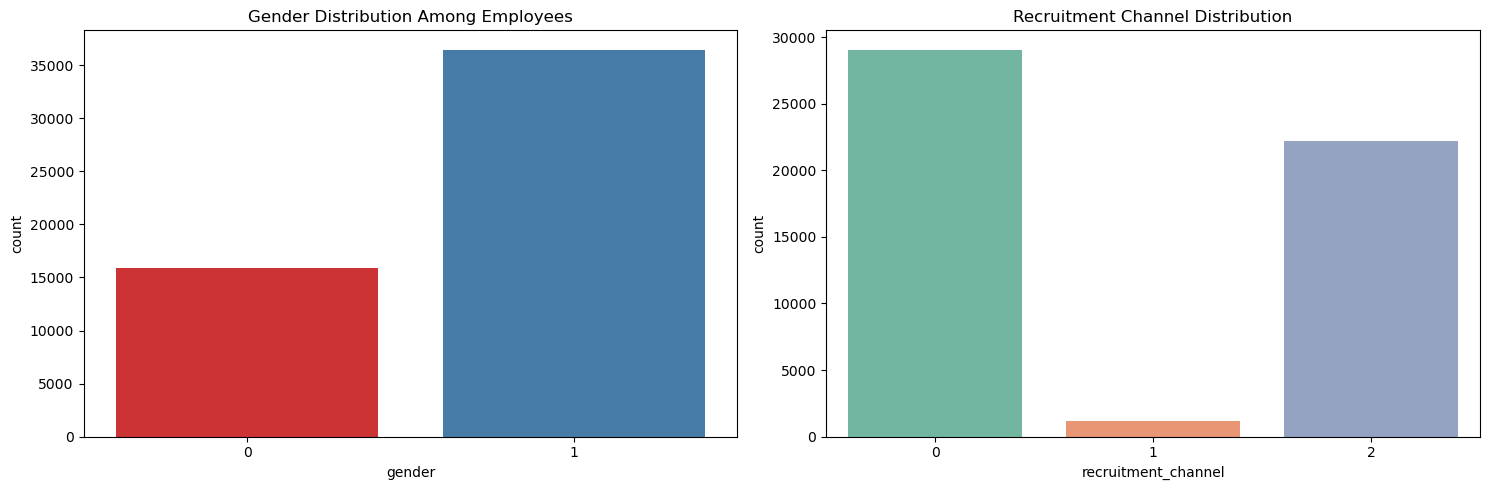

In [35]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Count plot for gender distribution
plt.subplot(121)
sns.countplot(x='gender', data=df, palette='Set1')
plt.title('Gender Distribution Among Employees')

# Plot 2: Count plot for recruitment channel distribution
plt.subplot(122)
sns.countplot(x='recruitment_channel', data=df, palette='Set2')
plt.title('Recruitment Channel Distribution')

# Show the plots
plt.tight_layout()
plt.show()


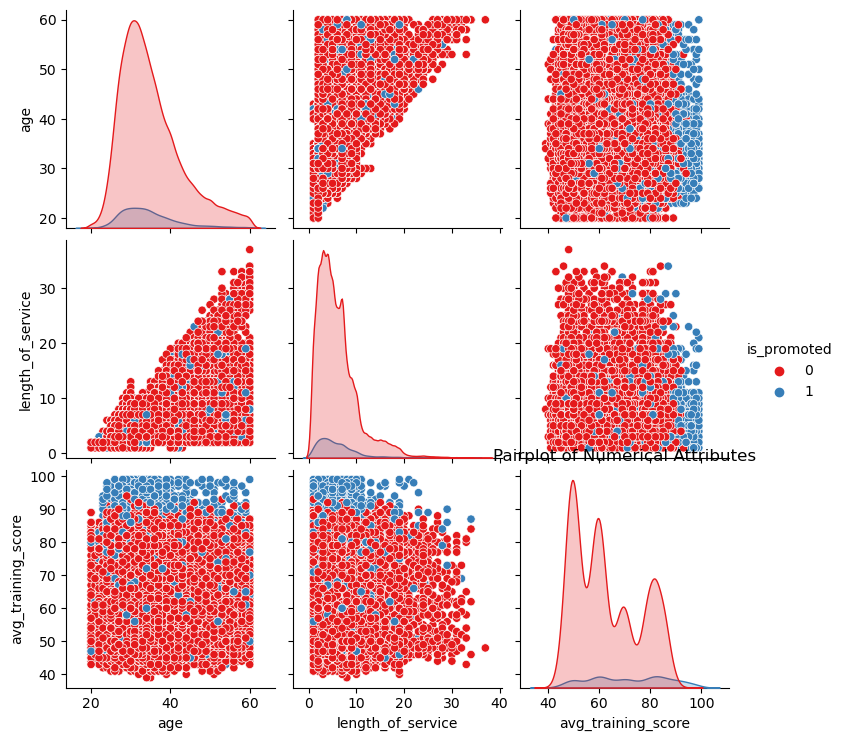

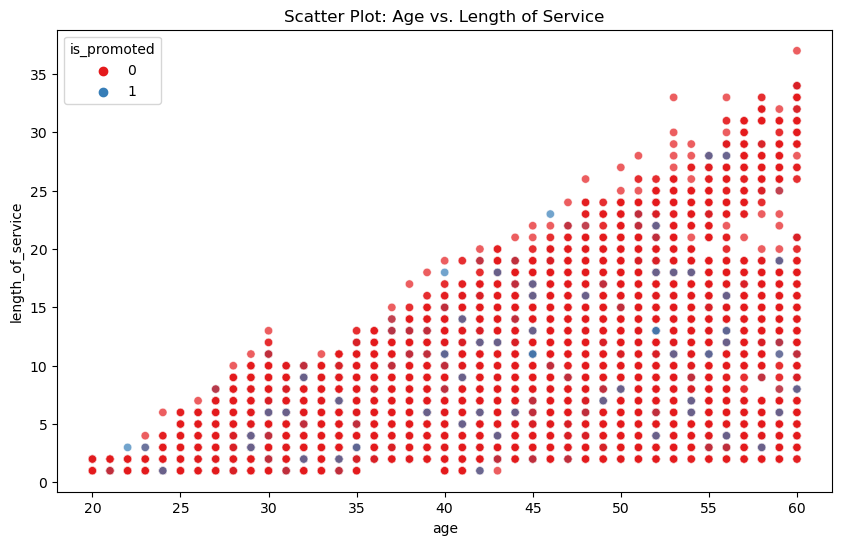

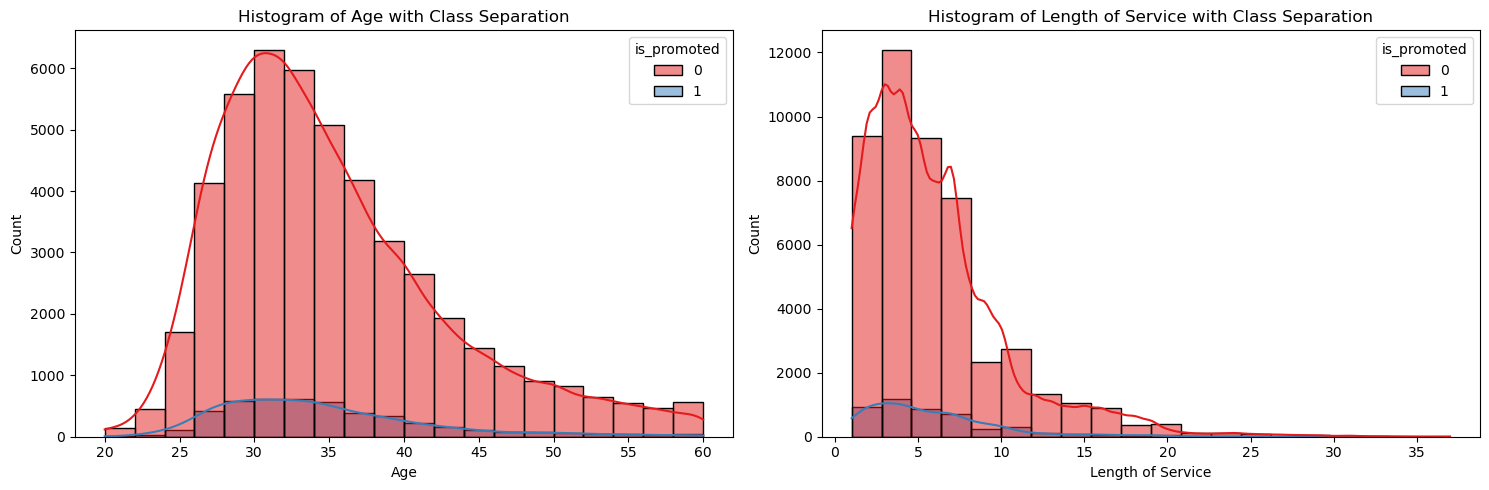

In [36]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to explore pairwise relationships between numerical attributes
sns.pairplot(df, vars=['age', 'length_of_service', 'avg_training_score'], hue='is_promoted', palette='Set1')
plt.title('Pairplot of Numerical Attributes')
plt.show()

# Scatter plot for 'age' vs. 'length_of_service' with class separation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='length_of_service', hue='is_promoted', data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Age vs. Length of Service')
plt.show()

# Histograms with class separation for 'age' and 'length_of_service'
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df, x='age', hue='is_promoted', bins=20, kde=True, palette='Set1')
plt.title('Histogram of Age with Class Separation')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(122)
sns.histplot(data=df, x='length_of_service', hue='is_promoted', bins=20, kde=True, palette='Set1')
plt.title('Histogram of Length of Service with Class Separation')
plt.xlabel('Length of Service')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


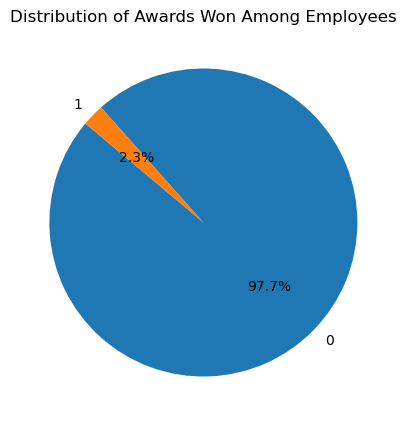

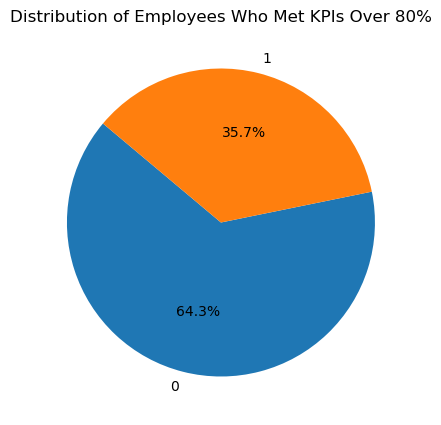

In [37]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a pie chart for 'awards_won?' distribution
awards_counts = df['awards_won?'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(awards_counts, labels=awards_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Awards Won Among Employees')
plt.show()

# Create a pie chart for 'KPIs_met >80%' distribution
kpi_counts = df['KPIs_met >80%'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(kpi_counts, labels=kpi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees Who Met KPIs Over 80%')
plt.show()


In [15]:
# converting the categrical variables into numerical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['education'] = le.fit_transform(df['education'])
df['gender'] = le.fit_transform(df['gender']) # Male = 1, Female = 0
df['recruitment_channel'] = le.fit_transform(df['recruitment_channel'])
df['region'] = le.fit_transform(df['region'])

In [16]:
df.head() # See the first 5 rows of the dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


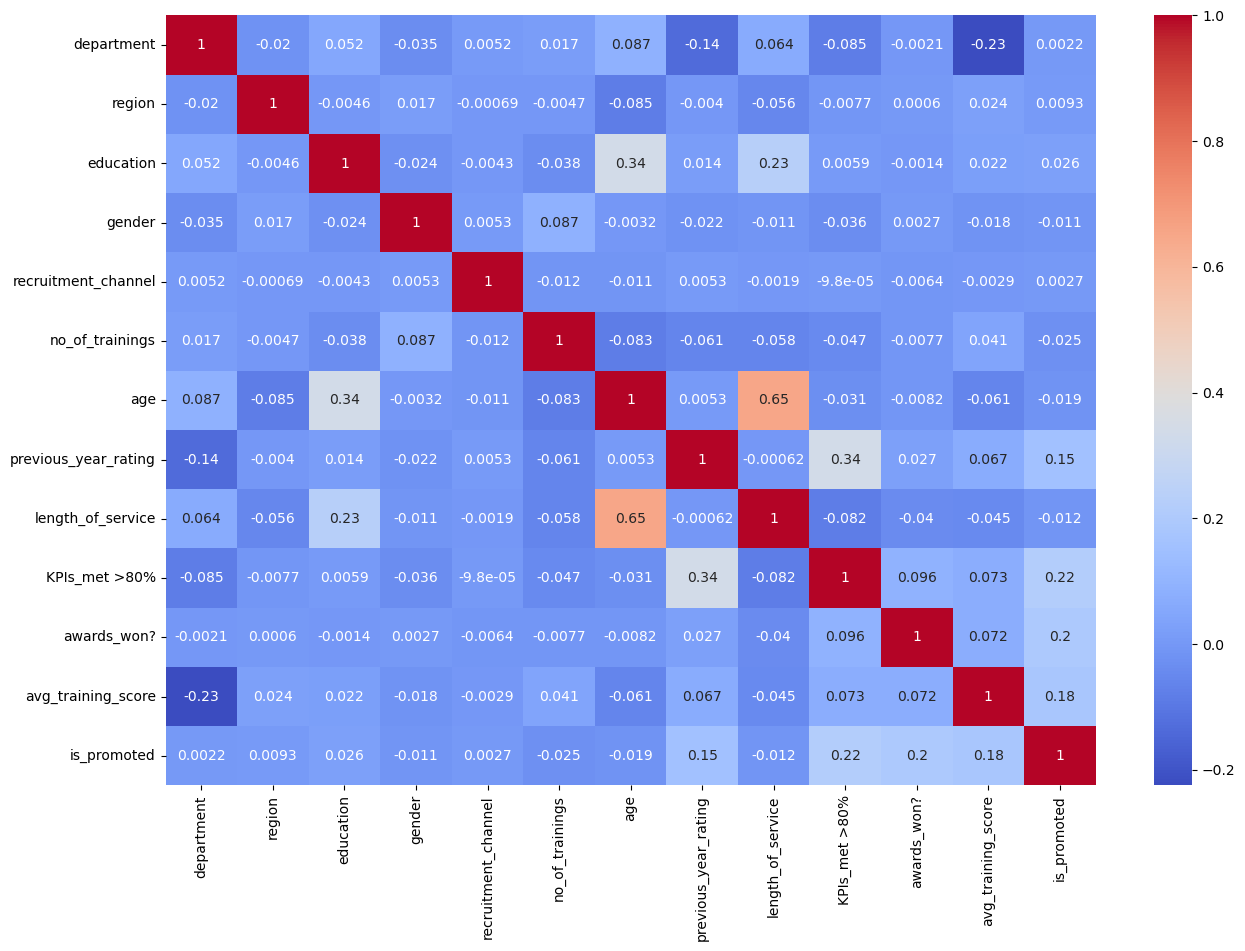

In [17]:
# correalation matrix
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


from the correllation heatmap  we can see that there is a high correlation between 'no_of_trainings' and 'previous_year_rating' and 'length_of_service' and 'KPIs_met >80%' and 'awards_won?'

In [18]:
# Split the data into features and target
X = df.drop('is_promoted', axis=1)
Y = df['is_promoted'] # Target variable
X.head() # See the first 5 rows of the dataset

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73


In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the data into 80% training and 20% testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape # Check the shape of the training and testing sets

((41919, 12), (10480, 12), (41919,), (10480,))

In [20]:
# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC curve and AUC score
from sklearn.metrics import precision_score, recall_score, f1_score  # Precision, recall, and F1 score
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Mean squared error and mean absolute error
from sklearn.metrics import mean_absolute_percentage_error  # Mean absolute percentage error
from sklearn.metrics import r2_score  # R-squared score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Accuracy, precision, recall, and F1 score
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import confusion_matrix  # Confusion matrix

In [21]:
# Create an instance of the logistic regression model
logreg = LogisticRegression() # Create an instance of the logistic regression model
logreg.fit(X_train, Y_train) # Fit the model to the training data
Y_pred = logreg.predict(X_test) # Predict the target variable for the test data
accuracy = accuracy_score(Y_test, Y_pred) # Calculate the accuracy of the model
print("Accuracy:", accuracy) # Print the accuracy of the model
print(classification_report(Y_test, Y_pred)) # Print the classification report
print(confusion_matrix(Y_test, Y_pred)) # Print the confusion matrix
print("Precision:", precision_score(Y_test, Y_pred)) # Print the precision score
print("Recall:", recall_score(Y_test, Y_pred)) # Print the recall score
print("F1 Score:", f1_score(Y_test, Y_pred)) # Print the F1 score
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred)) # Print the mean squared error
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred)) # Print the mean absolute error
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_test, Y_pred)) # Print the mean absolute percentage error
print("R-squared Score:", r2_score(Y_test, Y_pred)) # Print the R-squared score
print("ROC AUC Score:", roc_auc_score(Y_test, Y_pred)) # Print the ROC AUC score
print("Classification Report:\n", classification_report(Y_test, Y_pred)) # Print the classification report
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred)) # Print the confusion matrix

Accuracy: 0.913645038167939
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      9573
           1       0.51      0.09      0.15       907

    accuracy                           0.91     10480
   macro avg       0.71      0.54      0.55     10480
weighted avg       0.88      0.91      0.88     10480

[[9496   77]
 [ 828   79]]
Precision: 0.5064102564102564
Recall: 0.08710033076074973
F1 Score: 0.1486359360301035
Mean Squared Error: 0.08635496183206107
Mean Absolute Error: 0.08635496183206107
Mean Absolute Percentage Error: 33089424743084.832
R-squared Score: -0.09233164618746348
ROC AUC Score: 0.539528437604338
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      9573
           1       0.51      0.09      0.15       907

    accuracy                           0.91     10480
   macro avg       0.71      0.54      0.55     10480
weighted avg       0.88      0.9

From the provided code and analysis in In[19] and In[24], we can derive the following business insights:

1. Data Preprocessing:
   - Missing Values: In[5] identifies missing values in the dataset, particularly in the "education" column. In[13] addresses missing values in the "previous_year_rating" column by replacing them with the mean rating. This indicates that data quality and completeness are important for analysis.

2. Data Correlation:
   - In[19] shows a correlation heatmap of the variables, which can be used to identify relationships between features. Notably, there are high correlations between:
     - "no_of_trainings" and "previous_year_rating"
     - "length_of_service" and "KPIs_met >80%"
     - "length_of_service" and "awards_won?"

3. Model Building and Evaluation:
   - - Accuracy: The model achieves an accuracy of approximately 91.36%.
     - Precision and Recall: Precision is relatively low for the positive class (is_promoted), indicating that the model's ability to correctly identify promotions is not very high. Recall is also low, indicating that the model misses a significant number of actual promotions.
     - F1 Score: The F1 score, which balances precision and recall, is relatively low for the positive class.
     - Mean Squared Error and Mean Absolute Error: These metrics measure the error between predicted and actual values.
     - Mean Absolute Percentage Error: This metric is quite high, indicating a large percentage error in predictions.
     - R-squared Score: The R-squared score is negative, suggesting that the model does not explain the variance in the data well.
     - ROC AUC Score: The ROC AUC score, which measures the model's ability to distinguish between positive and negative classes, is approximately 0.54.

4. Classification Imbalance:
   - The classification report and confusion matrix show that the dataset is imbalanced, with a large number of non-promotions (class 0) and a smaller number of promotions (class 1). This imbalance affects the model's performance, leading to low precision and recall for the promotion class.

5. Business Decision:
   - The logistic regression model's current performance is not ideal for predicting promotions, as indicated by low precision, recall, and F1 score for promotions. Businesses may need to explore alternative models, feature engineering, or data balancing techniques to improve the prediction of employee promotions.


In [22]:
# evaluate the model using randon forest classifier, gradinet boosting classifier,decision tree classifier, K-NN classifier and naive bayes classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Create an instance of the different classifiers
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [24]:
# Fit the classifiers to the training data
rfc.fit(X_train, Y_train) # Fit the random forest classifier to the training data
gbc.fit(X_train, Y_train) # Fit the gradient boosting classifier to the training data
dtc.fit(X_train, Y_train) # Fit the decision tree classifier to the training data
knn.fit(X_train, Y_train) # Fit the K-NN classifier to the training data

KNeighborsClassifier()

In [25]:
# Predict the target variable for the test data
rfc_pred = rfc.predict(X_test) # Predict the target variable for the test data using the random forest classifier
gbc_pred = gbc.predict(X_test) # Predict the target variable for the test data using the gradient boosting classifier
dtc_pred = dtc.predict(X_test) # Predict the target variable for the test data using the decision tree classifier
knn_pred = knn.predict(X_test) # Predict the target variable for the test data using the K-NN classifier

In [26]:
print("Random Forest Classifier Classification Report:\n", classification_report(Y_test, rfc_pred)) # Print the classification report for the random forest classifier
print("Gradient Boosting Classifier Classification Report:\n", classification_report(Y_test, gbc_pred)) # Print the classification report for the gradient boosting classifier
print("Decision Tree Classifier Classification Report:\n", classification_report(Y_test, dtc_pred)) # Print the classification report for the decision tree classifier
print("K-NN Classifier Classification Report:\n", classification_report(Y_test, knn_pred)) # Print the classification report for the K-NN classifier

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.96      9573
           1       0.86      0.28      0.42       907

    accuracy                           0.93     10480
   macro avg       0.90      0.64      0.69     10480
weighted avg       0.93      0.93      0.92     10480

Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9573
           1       0.95      0.29      0.45       907

    accuracy                           0.94     10480
   macro avg       0.94      0.64      0.71     10480
weighted avg       0.94      0.94      0.92     10480

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      9573
           1       0.40      0.42      0.41       907

    accuracy                   

### We observe that the accuracy of prediction of is_promoted is fairly low on all the models this is because of sample imbalance 


In [27]:
# apply smote to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train) # Apply SMOTE to the training data
print("Shape of X_train_smote:", X_train_smote.shape) # Print the shape of the X_train_smote
print("Shape of Y_train_smote:", Y_train_smote.shape) # Print the shape of the Y_train_smote
print("Percentage of 0 in Y_train_smote:", (Y_train_smote == 0).sum() / len(Y_train_smote)) # Print the percentage of 0 in Y_train_smote
print("Percentage of 1 in Y_train_smote:", (Y_train_smote == 1).sum() / len(Y_train_smote)) # Print the percentage of 1 in Y_train_smote

Shape of X_train_smote: (76560, 12)
Shape of Y_train_smote: (76560,)
Percentage of 0 in Y_train_smote: 0.5
Percentage of 1 in Y_train_smote: 0.5


In [28]:
# apply smote to the test data
X_test_smote, Y_test_smote = smote.fit_resample(X_test, Y_test) # Apply SMOTE to the test data
print("Shape of X_test_smote:", X_test_smote.shape) # Print the shape of the X_test_smote
print("Shape of Y_test_smote:", Y_test_smote.shape) # Print the shape of the Y_test_smote
print("Percentage of 0 in Y_test_smote:", (Y_test_smote == 0).sum() / len(Y_test_smote)) # Print the percentage of 0 in Y_test_smote
print("Percentage of 1 in Y_test_smote:", (Y_test_smote == 1).sum() / len(Y_test_smote)) # Print the percentage of 1 in Y_test_smote


Shape of X_test_smote: (19146, 12)
Shape of Y_test_smote: (19146,)
Percentage of 0 in Y_test_smote: 0.5
Percentage of 1 in Y_test_smote: 0.5


In [29]:
# retrain the model using the smote data
rfc_smote = RandomForestClassifier() # Create an instance of the random forest classifier
rfc_smote.fit(X_train_smote, Y_train_smote) # Fit the random forest classifier to the smote training data
logreg_smote = LogisticRegression() # Create an instance of the logistic regression classifier
logreg_smote.fit(X_train_smote, Y_train_smote) # Fit the logistic regression classifier to the smote training data


LogisticRegression()

In [30]:
# predict the target variable for the smote test data
rfc_smote_pred = rfc_smote.predict(X_test_smote) # Predict the target variable for the smote test data using the random forest classifier
logreg_smote_pred = logreg_smote.predict(X_test_smote) # Predict the target variable for the smote test data using the logistic regression classifier

In [31]:
# classification report
print("Random Forest Classifier Classification Report (SMOTE):\n", classification_report(Y_test_smote, rfc_smote_pred)) # Print the classification report for the random forest classifier (SMOTE)
print("Logistic Regression Classification Report (SMOTE):\n", classification_report(Y_test_smote, logreg_smote_pred)) # Print the classification report for the logistic regression classifier (SMOTE)

Random Forest Classifier Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      9573
           1       0.95      0.79      0.87      9573

    accuracy                           0.88     19146
   macro avg       0.89      0.88      0.88     19146
weighted avg       0.89      0.88      0.88     19146

Logistic Regression Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.74      0.68      0.71      9573
           1       0.71      0.76      0.73      9573

    accuracy                           0.72     19146
   macro avg       0.72      0.72      0.72     19146
weighted avg       0.72      0.72      0.72     19146



In [38]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

def scale_dataset(dataset, scaler_type='RobustScaler'):
    """
    Scale a dataset using one of the provided scalers.

    Parameters:
    - dataset: The input dataset to be scaled.
    - scaler_type: A string specifying the type of scaler to use. Options: 'RobustScaler', 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler'.

    Returns:
    - scaled_dataset: The scaled dataset using the selected scaler.
    """
    if scaler_type == 'RobustScaler':
        scaler = RobustScaler()
    elif scaler_type == 'StandardScaler':
        scaler = StandardScaler()
    elif scaler_type == 'MinMaxScaler':
        scaler = MinMaxScaler()
    elif scaler_type == 'MaxAbsScaler':
        scaler = MaxAbsScaler()
    else:
        raise ValueError("Invalid scaler_type. Please choose from 'RobustScaler', 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler'.")

    scaled_dataset = scaler.fit_transform(dataset)
    return scaled_dataset

# Example usage:
# scaled_data_robust = scale_dataset(X, scaler_type='RobustScaler')
# scaled_data_standard = scale_dataset(X, scaler_type='StandardScaler')
# scaled_data_minmax = scale_dataset(X, scaler_type='MinMaxScaler')
# scaled_data_maxabs = scale_dataset(X, scaler_type='MaxAbsScaler')
